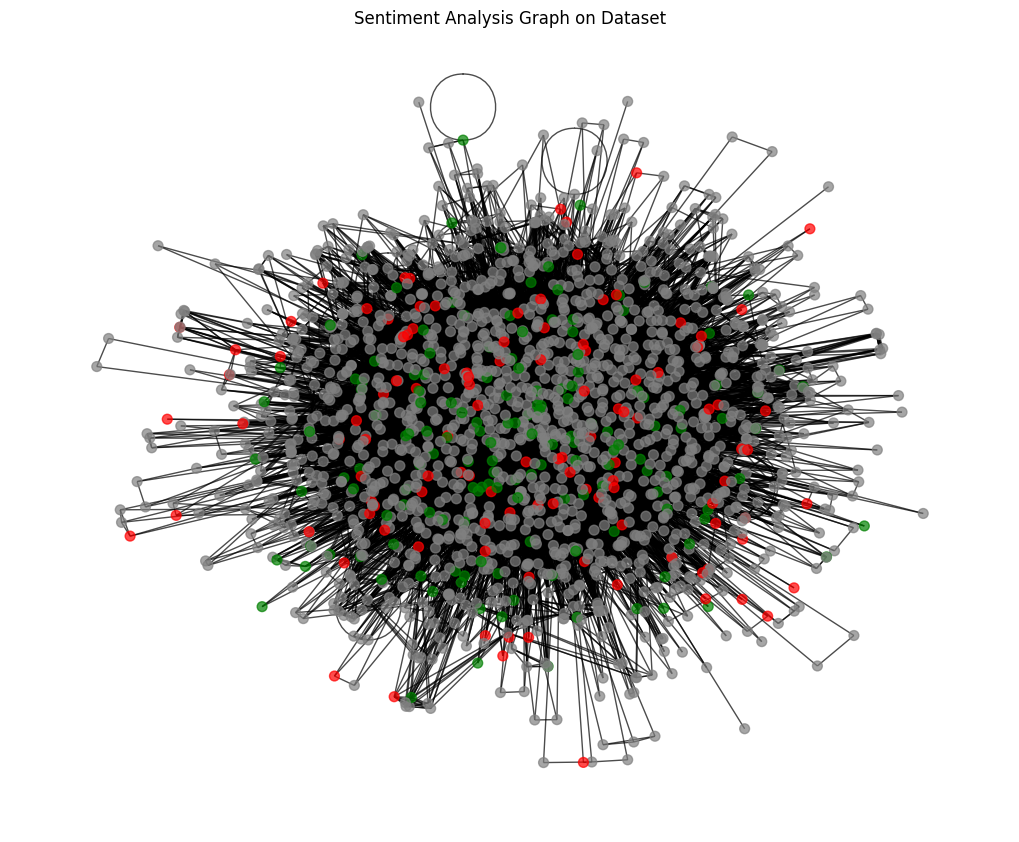

In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Load dataset
df = pd.read_csv("dataset.csv")

# Preprocessing
# Tokenization
df['tokens'] = df['sentence'].apply(lambda x: word_tokenize(x.lower()))

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Function to create a sentiment analysis graph
def create_sentiment_graph(tokens):
    G = nx.Graph()
    
    # Add edges based on co-occurrence in sentences
    for token_list in tokens:
        for i, token1 in enumerate(token_list):
            for j, token2 in enumerate(token_list):
                if i != j:  # Avoid self-loops
                    if not G.has_edge(token1, token2):
                        G.add_edge(token1, token2)
    
    # Add nodes and edges based on sentiment polarity
    for token_list in tokens:
        for token in token_list:
            G.add_node(token)
            sentiment = TextBlob(token).sentiment.polarity
            if sentiment > 0:
                color = 'green'
            elif sentiment < 0:
                color = 'red'
            else:
                color = 'gray'
            G.nodes[token]['color'] = color
    
    return G

# Create sentiment analysis graph
G = create_sentiment_graph(df['tokens'])

# Visualize the sentiment analysis graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
colors = [G.nodes[node]['color'] for node in G.nodes()]
nx.draw(G, pos, with_labels=False, node_color=colors, node_size=50, alpha=0.7)
plt.title("Sentiment Analysis Graph on Dataset")
plt.show()


In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Step 2: Load dataset
df = pd.read_csv("dataset.csv")

# Step 3: Preprocessing
# Tokenization
df['tokens'] = df['sentence'].apply(lambda x: word_tokenize(x.lower()))

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Step 4: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['tokens'], df['label'], test_size=0.2, random_state=42)

# Step 5: Tokenization and padding
max_words = 1000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Step 6: Build LSTM model
embedding_size = 100
model = Sequential()
model.add(Embedding(max_words, embedding_size, input_length=max_len))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Train the model
model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))
=
# Step 8: Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/5
25/25 [==============================] - 13s 156ms/step - loss: 0.6890 - accuracy: 0.5425 - val_loss: 0.6849 - val_accuracy: 0.6700
Epoch 2/5
25/25 [==============================] - 3s 110ms/step - loss: 0.6422 - accuracy: 0.7500 - val_loss: 0.6463 - val_accuracy: 0.6400
Epoch 3/5
25/25 [==============================] - 3s 113ms/step - loss: 0.4809 - accuracy: 0.8313 - val_loss: 0.5375 - val_accuracy: 0.7500
Epoch 4/5
25/25 [==============================] - 3s 108ms/step - loss: 0.3055 - accuracy: 0.8888 - val_loss: 0.5123 - val_accuracy: 0.7300
Epoch 5/5
7/7 [==============================] - 0s 23ms/step - loss: 0.5245 - accuracy: 0.7750
Test Accuracy: 0.7749999761581421


In [6]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 262.6 kB/s eta 0:00:03
   ----- --------------------------------- 81.9/626.3 kB 459.5 kB/s eta 0:00:02
   --------- ---------------------------- 163.8/626.3 kB 821.4 kB/s eta 0:00:01
   ----------------- ---------------------- 276.5/626.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------- ----------- 440.3/626.3 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 1.5 MB/s eta 0:00:00
